In [ ]:
!pip install scikit-image opencv-python-headless

In [ ]:
# استيراد المكتبات
import cv2
import numpy as np
from skimage import filters, measure
from google.colab.patches import cv2_imshow
from google.colab import files

In [ ]:
# رفع الصورة من الجهاز
uploaded = files.upload()

# الحصول على اسم الملف المرفوع
for filename in uploaded.keys():
    image_path = filename

Saving photo_1.jpg to photo_1.jpg


In [ ]:
# قراءة الصورة بالألوان
image = cv2.imread(image_path)

In [ ]:
# التحقق من نجاح تحميل الصورة
if image is None:
    print("❌ لم يتم تحميل الصورة بشكل صحيح.")
else:
    # تحويل الصورة إلى تدرج رمادي
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # استخدام Canny Edge Detection لكشف الحواف
    edges = cv2.Canny(gray, 50, 150)  # القيم 50 و 150 ممكن تعديلها حسب الصورة

    # توسيع الحواف (dilate) حتى تتصل ببعضها
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(edges, kernel, iterations=1)

    # إيجاد الكنتورز (Contours)
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # نسخة لونية من الصورة لرسم المستطيلات
    result_image = image.copy()

    # عداد الشوائب
    defect_count = 0
    total_defect_area = 0

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 50:  # استثناء الأجسام الصغيرة جدًا
            defect_count += 1
            total_defect_area += area
            # الحصول على إحداثيات المستطيل المحيط
            x, y, w, h = cv2.boundingRect(cnt)
            # رسم مستطيل أحمر حول العيب
            cv2.rectangle(result_image, (x, y), (x+w, y+h), (0, 0, 255), 2)

    # حساب نسبة الضرر من مساحة الصورة
    total_area = image.shape[0] * image.shape[1]
    damage_percentage = (total_defect_area / total_area) * 100

In [ ]:
 # طباعة الإحصائيات
print("📊 تقرير كشف الشوائب:")
print(f"- عدد الشوائب المكتشفة: {defect_count}")
print(f"- إجمالي مساحة الشوائب (بالبكسل): {total_defect_area}")
print(f"- نسبة الضرر من حجم الصورة: {damage_percentage:.2f}%")

📊 تقرير كشف الشوائب:
- عدد الشوائب المكتشفة: 12
- إجمالي مساحة الشوائب (بالبكسل): 33524.5
- نسبة الضرر من حجم الصورة: 4.45%


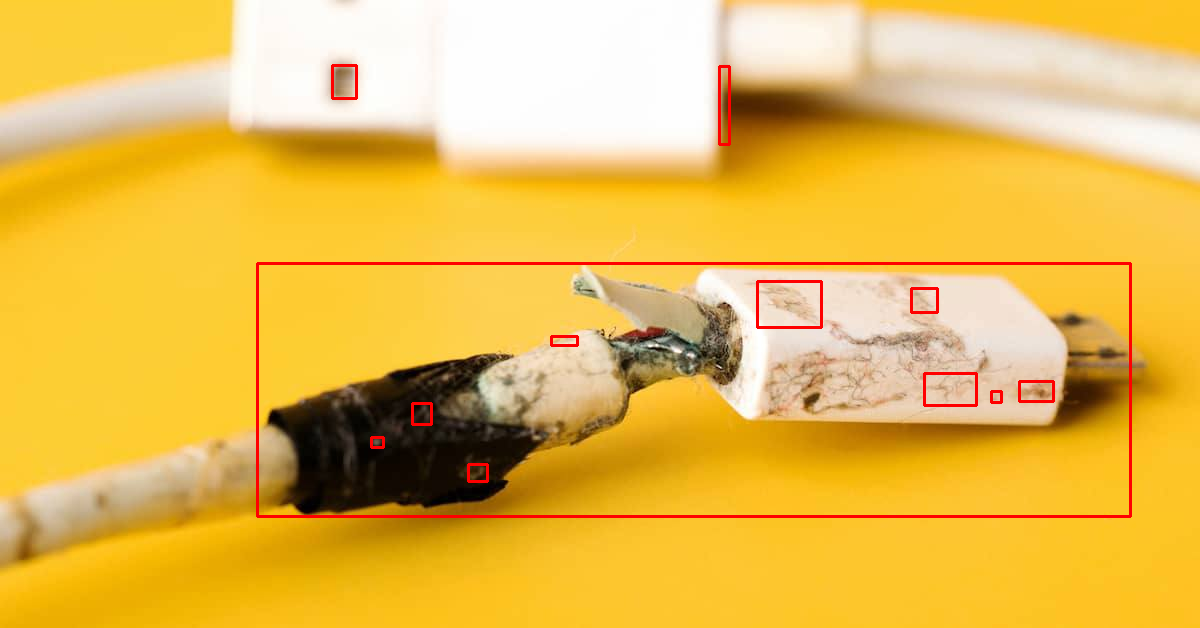

In [ ]:
# عرض الصورة بعد التحديد
cv2_imshow(result_image)